In [17]:
"""Suppose you are working as a data scientist for a retail store chain. The company
wants to better understand its customer base and tailor marketing strategies to
different customer segments. You have access to a dataset containing customer
information, such as age, annual income, and spending score (a metric representing
how much a customer spends in the store).
Your task is to perform customer segmentation using the k-means clustering
algorithm. By dividing customers into distinct groups based on their characteristics,
the retail store can target each segment with specific marketing campaigns and offers."""



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [18]:
customer_data = pd.read_excel('annual-income-2.xlsx')
customer_data.head()
customer_data.info()
customer_data.isnull().sum()

x = customer_data








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     20 non-null     int64
 1   age             20 non-null     int64
 2   annual_income   20 non-null     int64
 3   spending_score  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [38]:
features = customer_data.iloc[:, 1:].values

In [24]:
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [25]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

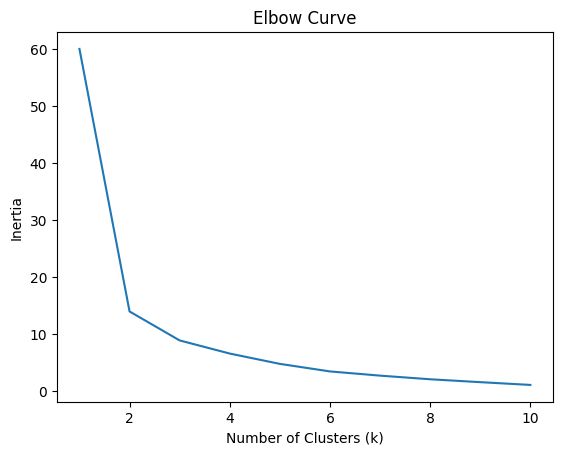

In [26]:
# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [40]:
# Choose the optimal number of clusters based on the elbow curve
k = 2

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [41]:
# Add the cluster labels to the original dataset
customer_data['Cluster'] = kmeans.labels_


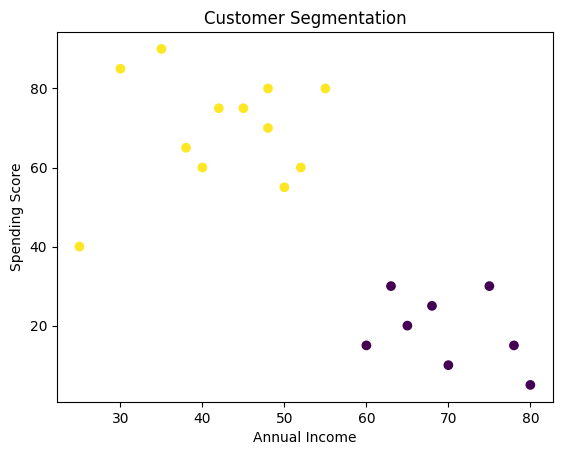

In [42]:
# Visualize the clusters
plt.scatter(customer_data['annual_income'], customer_data['spending_score'], c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

In [44]:
# Analyze the characteristics of each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['Age', 'Annual Income', 'Spending Score'])
cluster_df['Cluster'] = range(k)
cluster_df = cluster_df.round(2)
print(cluster_df)

     Age  Annual Income  Spending Score  Cluster
0  51.88          69.88           18.75        0
1  32.58          42.33           69.58        1


In [45]:
# Tailor marketing strategies based on customer segments
for cluster in range(k):
    segment = customer_data[customer_data['Cluster'] == cluster]
    # Implement specific marketing strategies for each segment
    # For example:
print(f"Marketing Strategy for Cluster {cluster}:")
print(segment)

Marketing Strategy for Cluster 1:
    customer_id  age  annual_income  spending_score  Cluster
0             1   22             25              40        1
1             2   35             45              75        1
3             4   40             55              80        1
4             5   28             40              60        1
5             6   32             48              70        1
10           11   25             30              85        1
11           12   38             50              55        1
13           14   30             35              90        1
14           15   42             52              60        1
16           17   33             42              75        1
18           19   37             48              80        1
19           20   29             38              65        1
